In [2]:
! [ -e /content ] && pip install -Uqq fastbook
import fastbook
fastbook.setup_book()
from fastai.vision.all import *
from fastbook import *


     |████████████████████████████████| 719 kB 5.2 MB/s 
     |████████████████████████████████| 4.7 MB 53.3 MB/s 
     |████████████████████████████████| 1.3 MB 15.2 MB/s 
     |████████████████████████████████| 365 kB 50.1 MB/s 
     |████████████████████████████████| 115 kB 59.9 MB/s 
     |████████████████████████████████| 141 kB 29.4 MB/s 
     |████████████████████████████████| 212 kB 61.9 MB/s 
     |████████████████████████████████| 101 kB 12.3 MB/s 
     |████████████████████████████████| 596 kB 41.4 MB/s 
     |████████████████████████████████| 127 kB 56.8 MB/s 
     |████████████████████████████████| 6.6 MB 869 kB/s 
Mounted at /content/gdrive


In [6]:
path = untar_data(URLs.PETS)

# 반려동물의 데이터셋을 가져옴

In [ ]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/annotations'),Path('/root/.fastai/data/oxford-iiit-pet/images')]

In [ ]:
# images 폴더 안에 있는 파일을 전부 보여줌

(path/'images').ls()

(#7393) [Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/american_pit_bull_terrier_59.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/pug_69.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/shiba_inu_154.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/scottish_terrier_116.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/english_cocker_spaniel_162.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Russian_Blue_78.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Bombay_83.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/Abyssinian_193.jpg'),Path('/root/.fastai/data/oxford-iiit-pet/images/samoyed_150.jpg')...]

In [ ]:
fname = (path/'images').ls()[0] 
fname # British_Shorthair_163.jpg' 첫번째 파일의 경로를 가져온다.

Path('/root/.fastai/data/oxford-iiit-pet/images/Persian_98.jpg')

In [ ]:
re.findall(r'(.+)_\d+.jpg$', fname.name)

['Persian']

In [7]:
# 정규표현식을 통해 레이블링 작업을 할 수 있도록 RegexLabeller 클래스를 제공한다.

pets = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'),
                 item_tfms = Resize(460), # 개별 사전 크기 적용
                 batch_tfms=aug_transforms(size=244, min_scale=0.75)) # 배치 별 증강 변환에 맞춰 크기 적용

dls = pets.dataloaders(path/'images')

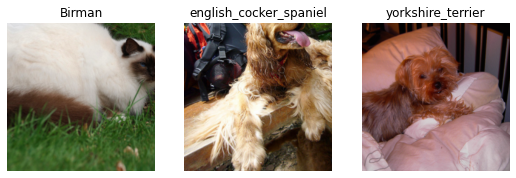

In [ ]:
# 데이터블록이 정상 작동하는지 확인

dls.show_batch(nrows=1, ncols=3)

In [ ]:
pets1 = DataBlock(blocks = (ImageBlock, CategoryBlock),
                 get_items = get_image_files,
                 splitter = RandomSplitter(seed=42),
                 get_y = using_attr(RegexLabeller(r'(.+)_\d+.jpg$'), 'name'))
                  # item_tfms, batch_tfms 를 지우고 summary method 사용

# pets1.summary(path/'images')

In [ ]:
pets.summary(path/'images')

Setting-up type transforms pipelines
Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}

Building one sample
  Pipeline: PILBase.create
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying PILBase.create gives
      PILImage mode=RGB size=300x225
  Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
    starting from
      /root/.fastai/data/oxford-iiit-pet/images/pomeranian_193.jpg
    applying partial gives
      pomeranian
    applying Categorize -- {'vocab': None, 'sort': True, 'add_na': False} gives
      TensorCategory(28)

Final sample: (PILImage mode=RGB size=300x225, TensorCategory(28))


Found 7390 items
2 datasets of sizes 5912,1478
Setting up Pipeline: PILBase.create
Setting up Pipeline: partial -> Categorize -- {'vocab': None, 'sort': True, 'add_na': False}
Setting up after_it

In [ ]:
learner = cnn_learner(dls, resnet34, metrics=error_rate)
# learner.fine_tune(2)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download

  0%|          | 0.00/83.3M [00:00<?, ?B/s]

epoch,train_loss,valid_loss,error_rate,time
0,1.500823,0.286671,0.095399,01:18


epoch,train_loss,valid_loss,error_rate,time
0,0.501799,0.262098,0.077808,01:20
1,0.308100,0.202285,0.064276,01:20


<img src=https://drive.google.com/uc?id=1KIkBw_jFvTBDXQWC5bQ_LFZCein7BYB5 height=300 width = 300>

In [ ]:
x,y = dls.one_batch()

x.shape # torch.Size([64, 3, 244, 244]) 4차원 텐서, 3은 뭐지?
y # 종속변수의 결과로 64개의 하나의 배치에 대해서 0~36개의 범주 즉, 37개의 카테고리로 세분화된 걸 알 수 있다.


TensorCategory([30, 13, 19,  5, 33,  4, 22,  2, 23, 10, 16, 13, 11, 28, 13,  7,  4, 24, 20, 26, 22,  9, 13, 33, 10,  1,  2, 17, 16, 16, 20, 29, 24, 23, 27, 29, 19, 11, 32, 29, 18,  5, 32,  5, 26, 20,
                14,  4, 25, 24, 11, 10, 25,  9, 12,  5, 17,  0, 17, 19,  7,  4, 32, 10], device='cuda:0')

In [ ]:
# 마지막 계층의 활성을 확인할 수 있다. 데이터셋의 인덱스로 0에는 학습, 1에는 검증을 넣는다.
preds, i = learner.get_preds(dl = [(x,y)])
i # tensor([ 8,  8, 10, 26, 35,  3, 31, 25,  2, 20, 13, 15, 28, 14,  2, 17,  5,  
  # 6, 32, 31,  2, 22, 13,  2, 29, 35, 22, 28,  6, 30, 32, 28, 25, 24, 21, 19,  
  # 7, 11,  7,  9,  2, 22, 13,  6, 21, 14,  0,  4,
  # 27,  9,  5, 35, 33, 30, 35, 25, 35,  3,  2, 20, 36, 26, 33,  5])

preds[0]

TensorBase([9.4758e-08, 6.3740e-06, 3.4074e-05, 6.4652e-07, 2.8237e-07, 1.3349e-06, 7.8515e-05, 3.6059e-06, 2.8928e-06, 3.1416e-07, 5.2955e-07, 1.5457e-08, 8.4188e-05, 7.8813e-06, 2.6449e-05,
            6.9127e-05, 2.1837e-06, 7.0909e-07, 1.9871e-06, 1.1287e-03, 3.0418e-06, 2.0273e-04, 3.6131e-06, 1.1173e-05, 1.1271e-06, 2.2398e-03, 3.0896e-07, 1.4433e-04, 1.4665e-06, 5.1460e-07,
            9.9592e-01, 1.8120e-06, 8.0349e-07, 7.1581e-06, 7.5911e-06, 2.3493e-06, 3.3956e-07])

In [ ]:
len(preds[0]), preds[0].sum()

(37, TensorBase(1.0000))

# cross-entropy-loss

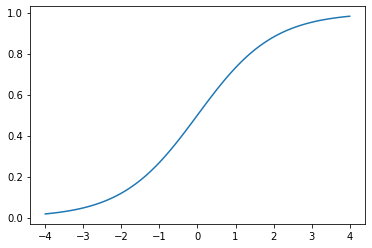

In [ ]:
plot_function(torch.sigmoid, min = -4, max = 4)


In [ ]:
# 소프트 맥스는 마지막 계층의 모든 활성값이 0~1이 되도록 조정하고, 모두 더하면 1이 되도록 만들어주는 함수다.

In [ ]:
examp = torch.randn((6,2))*2
examp

tensor([[-2.7469,  1.2929],
        [-3.3264, -0.6674],
        [-1.2777,  1.2582],
        [ 1.1777,  2.5570],
        [-1.6045, -3.3076],
        [ 2.2148, -2.0914]])

In [ ]:
examp.sigmoid()

# 바로 시그모이드를 적용할 수 없는게 3을 의미하는 1열과, 7을 의미하는 2열의 확률의 합이 1이 되어야하기 때문이다.
# 다음 확률은 순전히 relative percentage 를 나타내는데 그친다.

tensor([[0.0603, 0.7846],
        [0.0347, 0.3391],
        [0.2179, 0.7787],
        [0.7645, 0.9280],
        [0.1674, 0.0353],
        [0.9016, 0.1099]])

In [ ]:
(examp[:,0] - examp[:, 1]).sigmoid() # 3이 될 확률

tensor([0.0173, 0.0654, 0.0734, 0.2011, 0.8459, 0.9867])

In [ ]:
(examp[:, 1] - examp[:, 0]).sigmoid() # 7이 될 확률 시그모이드를 통해 3이 될 확률을 구했으니 1-3이될 확률을 해도 같은 값이 나온다.

tensor([0.9827, 0.9346, 0.9266, 0.7989, 0.1541, 0.0133])

## softmax

In [ ]:
from math import exp
# 이런 확률을 구하는 과정은 이진 분류에서는 간편하지만 다중분류를 해야 할 때에는 귀찮아진다.

def softmax(x):
  return exp(x) / exp(x).sum(dim=1, keepdim=True)

In [ ]:
sm_examp = torch.softmax(examp, dim=1)
sm_examp

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

**softmax를 사용하는 이유**

시그모이드의 다중 범주 버전으로 볼 수 있다.\
범주가 둘 이상이고 그 범주의 확률의 합이 1이어야만 하는 경우\
또는 두 범주만 있더라도 일관성을 유지하기 위해 사용하는 경우


활성의 값을 지수함수(exp)로 양수화 시키고 그 값을 전부 더해 범주마다의 지수함수 값으로 나누면
소프트맥스의 확률이 도출된다.

소프트맥스 :  ***범주의 지수함수 활성 / 모든 범주의 지수함수 활성의 합***

input에 대해 단 하나의 레이블로 분류하는 모델을 학습시키는데 이상적이다.



## log likelihood 로그 가능도

In [ ]:
targ = tensor([0,1,0,1,1,0])
sm_examp

tensor([[0.0173, 0.9827],
        [0.0654, 0.9346],
        [0.0734, 0.9266],
        [0.2011, 0.7989],
        [0.8459, 0.1541],
        [0.9867, 0.0133]])

In [ ]:
# 텐서의 색인기능 활용해 적절한 열을 선택할 수 있다.

idx = range(6) # 0~5
sm_examp[idx, targ]

# tensor([0.0025, 0.5336, 0.0247, 0.8862, 0.7508, 0.7080]) 1행 1열, 2행 2열, 3행 1열 ...

tensor([0.0173, 0.9346, 0.0734, 0.7989, 0.1541, 0.9867])

In [ ]:
# NLL negative log likelihood

# 정확하게 sm_examp[idx, targ]과 같은 역할을 하지만 음수까지도 수용할 수 있다.
-sm_examp[idx, targ] # tensor([-0.0025, -0.5336, -0.0247, -0.8862, -0.7508, -0.7080])
F.nll_loss(sm_examp, targ, reduction='none')

tensor([-0.0173, -0.9346, -0.0734, -0.7989, -0.1541, -0.9867])

# Model Interpretation

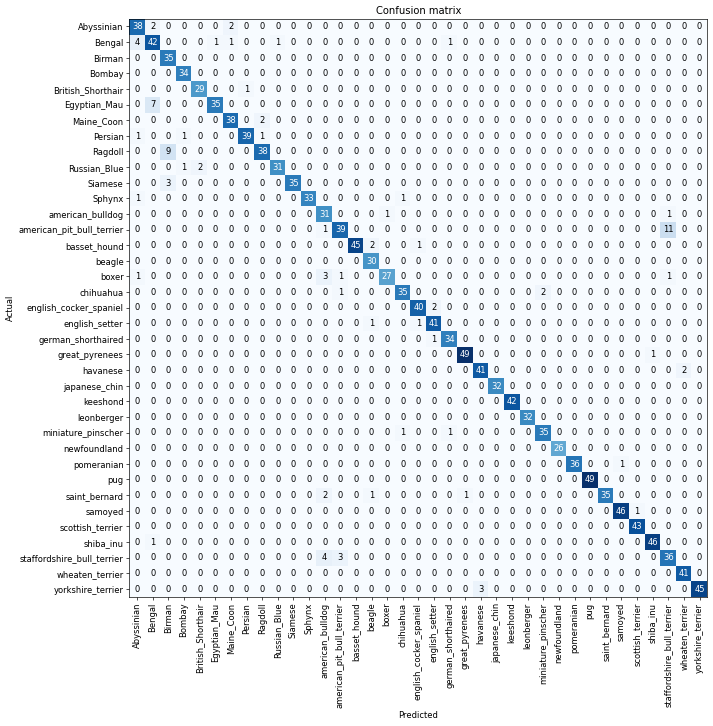

In [ ]:
from IPython.core.pylabtools import figsize
# 손실함수는 컴퓨터가 활용하여 파라미터를 조정하기 위해 설정된 것이지 인간이 보기 위해 만들어진 것은 아니다.
# 따라서 인간이 평가하기에는 다른 지표가 필요한데 이를 평가지표라 한다.

interp = ClassificationInterpretation.from_learner(learner)
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [ ]:
# 가장 값이 엇나간 행렬을 찾으려면 Most_confused 함수를 사용한다. min_val 로 최솟값을 지정할 수 있다.
interp.most_confused(min_val=5)

[('american_pit_bull_terrier', 'staffordshire_bull_terrier', 11),
 ('Ragdoll', 'Birman', 9),
 ('Egyptian_Mau', 'Bengal', 7)]

# Improve Model

학습률이 낮으면 에포크가 많이 필요해서 시간이 많이 소요될 수 있으며, \
과적합까지 야기할 가능성이 있다. \
학습률이 높다면 최소 손실지점을 완전히 비껴 갈 수도 있다.




## The Learning Rate Finder


In [ ]:
# 높은 학습률이 가져오는 결과

learn =cnn_learner(dls, resnet34, metrics = error_rate)
# learn.fine_tune(1, base_lr = 0.1)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,2.680394,5.084028,0.430311,01:15


epoch,train_loss,valid_loss,error_rate,time
0,3.739376,1.947743,0.571719,01:19


레즐리 스미스의 학습률 발견자 

매우작은 학습률부터 시작해서 곱을 하던 계속해서 학습률을 올려 배치에 적용하고,

손실이 나빠지기 직전까지 반복한다.

많은 움직임을 가진 지점을 발견하고 그 이전에 있는 학습률을 가지고 모델을 구현하면 된다.

* 최소손실이 발생한 지점보다 한 자릿수 작은 학습률 예) 0.45 => 0.045
* 손실이 명확히 감소하는 마지막 지점

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


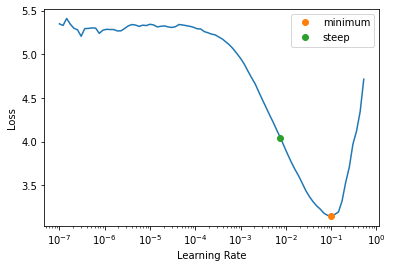

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min, lr_steep = learn.lr_find(suggest_funcs=(minimum, steep))


In [ ]:
# 학습률 도표를 보면 3e-3의 부근이 학습률로 적당해보인다.

learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fine_tune(2, base_lr = 3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.311661,0.327135,0.105548,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.513537,0.484058,0.138024,01:20
1,0.323025,0.231444,0.075101,01:20


## unfreezing and transfer learning

In [10]:
# 미세조정문제는 신중하게 사전학습된 가중치를 망가뜨리지 않고,
# 추가된 선형계층의 임의가중치를 새로운 작업을 올바르게 푸는 가중치로 바꾸는 작업

learn = cnn_learner(dls, resnet34, metrics = error_rate)
learn.fit_one_cycle(3, 3e-3)

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.151819,0.321718,0.105548,01:18
1,0.517408,0.235283,0.073072,01:15
2,0.305874,0.198983,0.064953,01:15


In [11]:
# 동결 해제
learn.unfreeze()

SuggestedLRs(valley=1.737800812406931e-05)

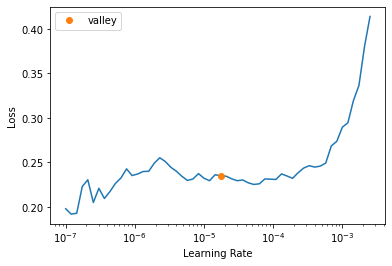

In [13]:

learn.lr_find()

In [15]:
learn.fit_one_cycle(6, lr_max=1e-5)

epoch,train_loss,valid_loss,error_rate,time
0,0.238098,0.184452,0.058863,01:20
1,0.205156,0.182445,0.057510,01:21
2,0.202369,0.184143,0.059540,01:19
3,0.184115,0.183310,0.060893,01:20
4,0.172872,0.177315,0.056157,01:20
5,0.156339,0.183135,0.058863,01:20


In [16]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
learn.fit_one_cycle(2, 3e-3)
learn.unfreeze()
learn.fit_one_cycle(3, lr_max=slice(1e-6, 1e-4))

/usr/local/lib/python3.7/dist-packages/fastai/vision/learner.py:287: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:136: UserWarning: Using 'weights' as positional parameter(s) is deprecated since 0.13 and will be removed in 0.15. Please use keyword parameter(s) instead.
  f"Using {sequence_to_str(tuple(keyword_only_kwargs.keys()), separate_last='and ')} as positional "
/usr/local/lib/python3.7/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and will be removed in 0.15. The current behavior is equivalent to passing `weights=ResNet34_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet34_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


epoch,train_loss,valid_loss,error_rate,time
0,1.006965,0.299616,0.090663,01:18
1,0.462952,0.222329,0.070365,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.295061,0.220270,0.067659,01:20
1,0.297380,0.214777,0.066306,01:20
2,0.248215,0.208928,0.065629,01:20


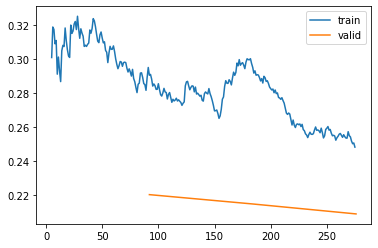

In [17]:
learn.recorder.plot_loss()

# Discriminative learning rates

* 참고 문헌
https://kozodoi.me/python/deep%20learning/pytorch/tutorial/2022/03/29/discriminative-lr.html

차별적 학습률이란 기존 사전학습이 된 모델의 가중치를 동결 해제 후 학습을 통해 가중치를 조정할 때, \
과연 각 레이어마다 동일한 학습률을 부여하느냐에 대한 반론이다.

사전 학습 모델은 head로 나올 수록 점점 복잡성을 가지는 반면, 가장 깊이 있는 아주 간단한 특징만을 \
짚어내는 레이어는 이미 그 자체로 완벽에 가까운 가중치를 갖고 있으므로 학습률을 극적으로 조정해서 \
가중치를 조정할 필요가 없다.

1. 뉴럴 네트워크에 있는 학습가능한 레이어를 확인하고,
2. 모델 파라미터의 리스트를 적절한 학습률과 설정하고
3. 모델 파라미터를 옵티마이저에 적용시킨다.

# Select Epoch times

에포크를 정할 때 주로 받는 제약은 학습을 진행할 시간이다.

먼저 얼만큼의 시간이 주어져서 학습을 할 수 있을 지 판단한 후, \
그럼에도 불구하고 마지막 에포크에서 더 학습될 여지가 보인다하면 모델에게 학습할 시간이 충분 \
하지 않았음을 의미한다.

그러나 정말 많은 시간을 들여 학습시켰다면 오히려 데이터 셋을 암기하는 과적합(overfit) 현상이 \
일어날 수도 있다.

과적합이 발견되면 즉시 종료하고 해당 결과의 에포크를 참조하여 다시 새로운 에포크 횟수를 정해야 할 \
것이다.